In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [21]:
Day_Time1 = pd.read_csv('Store1-58.csv')
Day_Time2 = pd.read_csv('Store59-74.csv')
Day_Time = pd.concat([Day_Time1, Day_Time2])

In [25]:
Store_Attributes = pd.read_csv('Restaurant Attributes.csv')

In [26]:
Day_Time

,StoreKey,DayOfWeek,QuarterHour,STIME,Zip,State,GeoRegion,RegionName,OffSiteOrder,OnSiteOrder,TotalOrder,OnSiteItem,OffSiteItem,TotalItem,OnSiteGuest
0,2,Tuesday,11.75,11:45:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,2,0,2,0,10,10,29
1,2,Tuesday,17.00,17:00:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,2,0,2,0,7,7,62
2,2,Wednesday,22.75,22:45:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,0,0,0,0,0,0,56
3,2,Monday,17.25,17:15:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,4,0,4,0,12,12,67
4,2,Tuesday,16.25,16:15:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,2,0,2,0,6,6,52
5,2,Friday,0.00,00:00:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,0,0,0,0,1,1,1
6,2,Sunday,19.25,19:15:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,8,0,8,0,23,23,187
7,2,Saturday,15.75,15:45:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,2,0,2,0,8,8,136
8,2,Tuesday,22.75,22:45:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,0,0,0,0,1,1,43
9,2,Tuesday,20.50,20:30:00.0000000,90292,CA,US West,SOUTHERN CALIFORNIA,5,0,5,0,15,15,139


In [27]:
Day_Time = Day_Time.merge(right=Store_Attributes[['StoreKey','ProductiveSQFT','ProductiveSeat']], how='left', on = 'StoreKey')

In [30]:
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Monday',1,np.nan)
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Tuesday',2,Day_Time['DayofWeekNum'])
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Wednesday',3,Day_Time['DayofWeekNum'])
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Thursday',4,Day_Time['DayofWeekNum'])
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Friday',5,Day_Time['DayofWeekNum'])
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Saturday',6,Day_Time['DayofWeekNum'])
Day_Time['DayofWeekNum'] = np.where(Day_Time['DayOfWeek']=='Sunday',7,Day_Time['DayofWeekNum'])
Day_Time['Label2'] = (Day_Time['QuarterHour'] % 2==0) & (np.floor(Day_Time['QuarterHour'])%2==0)
Day_Time['Time'] = Day_Time['DayOfWeek']+' '+Day_Time['STIME'].str.slice(0,5)

In [34]:
#Day_Time = Day_Time[((Day_Time['DayofWeekNum']<=5)&(Day_Time['QuarterHour']>=10))|(Day_Time['DayofWeekNum'])]

In [41]:
d = Day_Time.sort_values(by=['DayofWeekNum','QuarterHour']).pivot(index='Time',columns='StoreKey',values='OffSiteItem').fillna(0)

In [50]:
plt.figure(figsize=(12,6))
plt.plot(d[d.columns in [1,2,3]])
plt.legend()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 864x432 with 0 Axes>

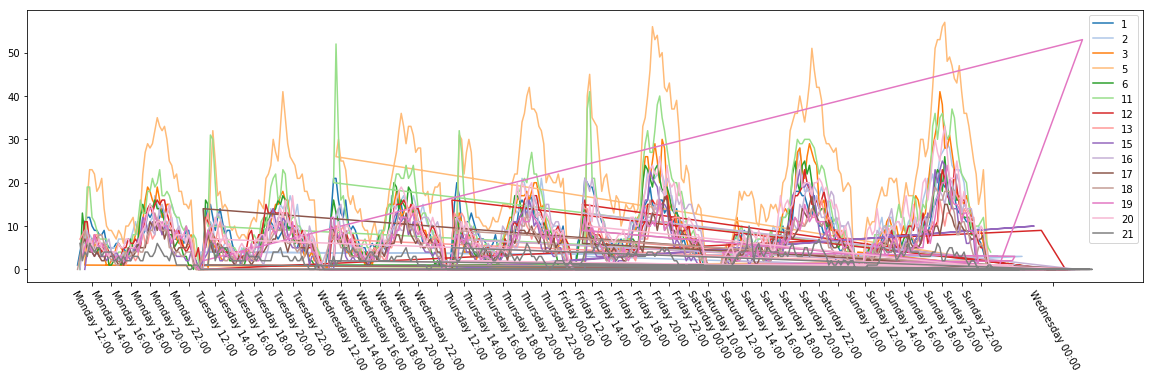

In [32]:
palette = plt.get_cmap('tab20')
plt.figure(figsize=(20,5))
Day_Time = Day_Time.sort_values(by=['StoreKey','DayofWeekNum','QuarterHour'],ascending=True)
s = Day_Time['StoreKey'].unique()
for i in range(0,15):
    d = Day_Time[Day_Time['StoreKey']==s[i]]
    plt.plot(d['Time'],d['OffSiteItem'],c=palette(i),label=s[i])
plt.xticks(d[d['Label2']]['Time'],rotation=300)
plt.legend()

In [33]:
Day_Time['OnSiteBusiness'] = Day_Time['OnSiteItem']/Day_Time['ProductiveSeat']

In [372]:
Day_Time['Rank'] = Day_Time.sort_values(by=['OffSiteOrder','OffSiteItem']).groupby('StoreKey')[['OffSiteOrder','OffSiteItem']].cumcount(ascending=False)

In [373]:
t = Day_Time[Day_Time['Rank']<=5]

In [374]:
l = list(t['Time'].value_counts().index[0:8])

In [375]:
Day_Time['Period'] = None
Day_Time['Period'] = np.where((Day_Time['DayofWeekNum']<=5)&(Day_Time['FullHour'].isin([12,13])), 'WeekdayLunch',Day_Time['Period'])
Day_Time['Period'] = np.where((Day_Time['DayofWeekNum']<=4)&(Day_Time['FullHour'].isin([18,19])),'WeekdayDinner',Day_Time['Period'])
Day_Time['Period'] = np.where((Day_Time['DayofWeekNum']>=5)&(Day_Time['FullHour'].isin([18,19,20])),'WeekendDinner',Day_Time['Period'])
Day_Time['Period'] = np.where((Day_Time['DayofWeekNum']>=6)&(Day_Time['FullHour'].isin([11,12,13])),'WeekendLunch',Day_Time['Period'])


In [376]:
#d = Day_Time1[Day_Time1['Time'].isin(l)].pivot_table(index='StoreKey',columns='Time',values=['OffSiteOrder','OnSiteOrder'])

In [377]:
d = Day_Time[pd.isnull(Day_Time['Period'])==False][['StoreKey','Period','OffSiteItem','OnSiteBusiness']]

In [378]:
d.shape

(6468, 4)

In [379]:
d = d.groupby(['StoreKey','Period'])[['OnSiteBusiness','OffSiteItem']].mean().reset_index()

In [380]:
#d['OnSiteBusiness_avg']=d.groupby(['StoreKey','Period'])['OnSiteBusiness'].transform(lambda x: np.mean(x))

In [381]:
d = d.pivot(index='StoreKey',columns='Period',values=['OnSiteBusiness','OffSiteItem'])

In [382]:
d

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
1              0.520161     0.628387      0.667384     0.683871        32.250   
2              0.403662     0.342994      0.526893     0.479299        41.625   
3              0.441889     0.273366      0.607479     0.533091        42.875   
5              0.307042     0.264225      0.438498     0.321127        86.625   
6              0.448980     0.382449      0.618141     0.612925        37.750   
11             0.475062     0.344888      0.663896     0.526185        53.250   
12             0.346655     0.299320      0.466364     0.425926        38.000   
13             0.309126     0.319537      0.478435     0.475150        27.500   
15             0.359173     0.282429      0.534022     0.459087        29.000   
16             0.322720     0.384277      0.460517     0.537212        28.750   
17             0.346398     0.258475      0.517263     0.501412        23.000   
18             0.412611     0.407965      0.619961     0.654130        25.250   
19             0.340000     0.282286      0.531111     0.435714        29.750   
20             0.379005     0.289474      0.577168     0.454996        38.875   
21             0.567951     0.432267      0.602390     0.505814        10.375   
22             0.487609     0.546647      0.776482     0.790087        40.000   
23             0.385239     0.351877      0.549109     0.441411        43.000   
24             0.442308     0.462912      0.682540     0.580586        20.375   
25             0.402036     0.355216      0.643483     0.590755        28.125   
26             0.443218     0.435962      0.664914     0.651945        38.875   
27             0.417195     0.443401      0.703046     0.613790        22.375   
28             0.569801     0.421083      0.756885     0.648623        34.625   
29             0.713679     0.626038      0.844025     0.858491        46.625   
30             0.495015     0.361043      0.640082     0.888548        23.125   
32             0.529304     0.323077      0.665039     0.562271        31.250   
33             0.610944     0.552209      0.707720     0.787818        62.250   
34             0.687126     0.567665      0.791084     0.716567        42.000   
35             0.466639     0.424662      0.656532     0.620495        32.750   
36             0.437316     0.306490      0.551622     0.470010        37.750   
37             0.451841     0.348725      0.514951     0.728045        30.375   
...                 ...          ...           ...          ...           ...   
176            0.575743     0.535688      0.759190     0.779430        34.375   
177            0.276502     0.323322      0.453082     0.509423        13.500   
178            0.455814     0.477209      0.594832     0.717054        16.000   
179            0.355088     0.294248      0.463127     0.715339        15.000   
180            0.468206     0.337282      0.630662     0.528455        23.750   
181            0.345383     0.254007      0.506775     0.270616        29.250   
182            0.486626     0.407819      0.626429     0.781207        21.625   
183            0.479077     0.274249      0.677158     0.423462        46.000   
184            0.382560     0.303629      0.664875     0.551747        14.375   
185            0.357678     0.182772      0.515189     0.584894        27.250   
186            0.457553     0.356684      0.702911     0.523619        19.625   
187            0.389831     0.647458      0.502448     0.637853        14.875   
188            0.322842     0.278417      0.513589     0.543165        12.000   
189            0.602941     0.424706      0.781699     0.738725        25.250   
190            0.349185     0.268478      0.473833     0.519928        17.250   
191            0.291228     0.252982    

In [383]:
#Scaling
d = d.dropna()
d_scaled = preprocessing.scale(d)
d.head() 

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
1              0.520161     0.628387      0.667384     0.683871        32.250   
2              0.403662     0.342994      0.526893     0.479299        41.625   
3              0.441889     0.273366      0.607479     0.533091        42.875   
5              0.307042     0.264225      0.438498     0.321127        86.625   
6              0.448980     0.382449      0.618141     0.612925        37.750   

                                                  
Period   WeekdayLunch WeekendDinner WeekendLunch  
StoreKey                                          
1                27.2     38.111111    18.833333  
2                13.7     54.666667    20.166667  
3                11.3     59.333333    19.000000  
5                51.4    114.555556    42.666667  
6                13.5     46.333333    12.833333

In [384]:
n1= 15
kmeans = KMeans(n_clusters=n1,random_state=0).fit(d_scaled)
#Retrieve Cluster Result and Store in column 'Class' 
d['Class'] = None
for i in range(n1):
    d['Class'] = np.where(kmeans.labels_==i,i,d['Class'])
d['Class']=d['Class'].astype('object') 

In [385]:
#Calculate Original Cluster Centers
cluster1 = []
for i in range(n1):
    cluster1.append(d[d['Class']==i].mean())
cluster1 = pd.DataFrame(cluster1)
#Sorting Clusters by TotalItem, TotalOrder
cluster_ranking1 = cluster1.sort_values(by=('OffSiteItem','WeekdayDinner'),ascending=False).reset_index().drop(columns='index').reset_index()[['Class','index']]
cluster_ranking1.columns=['Class','Rank']
cluster_ranking1 = cluster_ranking1.set_index('Class')
#Rank the Clusters: cluster with fewer item and orders assigned with smaller number for 'RankedClass'
d['RankedClass'] = None
for i in range(n1): 
    d['RankedClass'] = np.where(d['Class']==i,cluster_ranking1.loc[i,'Rank'],d['RankedClass'])

C:\Apps\Anaconda3\lib\site-packages\pandas\core\generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [386]:
#Calculate and Show Cluster Centers after Raning
cluster_result = []
for i in range(n1):
    cluster_result.append(d[d['RankedClass']==i].mean().append(pd.Series({'Count':d[d['RankedClass']==i]['Class'].count()})))
cluster_result = pd.DataFrame(cluster_result)
cluster_result

,"(OnSiteBusiness, WeekdayDinner)","(OnSiteBusiness, WeekdayLunch)","(OnSiteBusiness, WeekendDinner)","(OnSiteBusiness, WeekendLunch)","(OffSiteItem, WeekdayDinner)","(OffSiteItem, WeekdayLunch)","(OffSiteItem, WeekendDinner)","(OffSiteItem, WeekendLunch)","(Class, )","(RankedClass, )",Count
0,0.307042,0.264225,0.438498,0.321127,86.625000,51.400000,114.555556,42.666667,7.0,0.0,1.0
1,0.611475,0.525322,0.730098,0.733640,62.125000,23.575000,78.833333,28.500000,10.0,1.0,4.0
2,0.752126,0.652381,1.011716,0.895125,60.875000,37.400000,89.888889,32.333333,8.0,2.0,1.0
3,0.539828,0.463161,0.695417,0.550584,48.250000,33.600000,65.259259,21.555556,1.0,3.0,3.0
4,0.432470,0.306178,0.603529,0.513502,48.068182,21.500000,67.060606,24.515152,6.0,4.0,11.0
5,0.590317,0.523868,0.744319,0.737170,37.816667,19.513333,50.444444,19.777778,4.0,5.0,15.0
6,0.493347,0.402439,0.642274,0.638094,35.604167,16.287500,47.050926,17.111111,3.0,6.0,24.0
7,0.350867,0.308242,0.513453,0.461836,32.558824,18.041176,42.300654,16.568627,11.0,7.0,17.0
8,0.662627,0.410544,0.772169,0.511273,28.850000,12.800000,38.066667,10.433333,14.0,8.0,5.0
9,0.424676,0.309554,0.596406,0.499856,25.949219,11.721875,34.430556,12.052083,2.0,9.0,32.0


In [387]:
d[d['RankedClass']==0]

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
5              0.307042     0.264225      0.438498     0.321127        86.625   

                                                 Class RankedClass  
Period   WeekdayLunch WeekendDinner WeekendLunch                    
StoreKey                                                            
5                51.4    114.555556    42.666667     7           0

In [388]:
d[d['RankedClass']==1]

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
33             0.610944     0.552209      0.707720     0.787818        62.250   
95             0.594626     0.495016      0.706819     0.681724        50.750   
170            0.577830     0.537107      0.743536     0.750524        60.625   
171            0.662500     0.516957      0.762319     0.714493        74.875   

                                                 Class RankedClass  
Period   WeekdayLunch WeekendDinner WeekendLunch                    
StoreKey                                                            
33               18.3     74.222222    24.000000    10           1  
95               25.2     72.555556    29.166667    10           1  
170              27.7     80.777778    30.666667    10           1  
171              23.1     87.777778    30.166667    10           1

In [389]:
d[d['RankedClass']==2]

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
200            0.752126     0.652381      1.011716     0.895125        60.875   

                                                 Class RankedClass  
Period   WeekdayLunch WeekendDinner WeekendLunch                    
StoreKey                                                            
200              37.4     89.888889    32.333333     8           2

In [358]:
d[d['RankedClass']==3]

OnSiteBusiness                                           OffSiteItem  \
Period    WeekdayDinner WeekdayLunch WeekendDinner WeekendLunch WeekdayDinner   
StoreKey                                                                        
1              0.669355     0.692258      0.977778     0.736559        32.250   
2              0.309713     0.280573      0.417551     0.313694        41.625   
3              0.414649     0.320823      0.587571     0.421711        42.875   
12             0.995465     0.776644      1.410935     0.977702        38.000   
16             1.921384     1.577358      2.749126     1.969078        28.750   
20             1.919050     1.559497      2.814645     2.000381        38.875   
22             0.500729     0.438776      0.650470     0.500000        40.000   
23             0.778584     0.667918      1.027304     0.742321        43.000   
26             1.398659     1.240063      2.020329     1.459516        38.875   
29             2.608019     2.293208      3.751363     2.764780        46.625   
55             0.976408     0.801408      1.321753     0.996244        43.750   
59             1.963585     1.596359      2.590103     2.018674        34.125   
85             1.030100     0.771572      1.447046     1.044593        39.000   
103            0.611111     0.502703      0.842843     0.701201        45.875   
151            0.739111     0.514286      0.969415     0.790941        32.875   
154            0.946751     0.801805      1.321701     0.986161        44.125   
156            1.400629     1.168345      1.917666     1.467626        53.500   
160            2.230508     1.800678      3.000000     2.263842        39.000   
173            2.070483     1.812773      2.909657     2.239875        41.750   
176            0.569238     0.482900      0.712515     0.593556        34.375   
183            2.104614     1.720601      2.879828     2.192418        46.000   

                                                 Class RankedClass  
Period   WeekdayLunch WeekendDinner WeekendLunch                    
StoreKey                                                            
1                27.2     38.111111    18.833333     6           3  
2                13.7     54.666667    20.166667     6           3  
3                11.3     59.333333    19.000000     6           3  
12               17.5     43.777778    16.500000     6           3  
16               23.3     43.444444    19.500000     6           3  
20               21.9     56.222222    22.000000     6           3  
22               20.5     59.000000    20.833333     6           3  
23               22.7     50.000000    17.166667     6           3  
26               18.4     45.555556    18.666667     6           3  
29               17.0     58.222222    18.333333     6           3  
55               18.4     50.555556    20.500000     6           3  
59               24.9     53.777778    22.333333     6           3  
85               17.4     52.333333    20.333333     6           3  
103              23.1     70.222222    28.166667     6           3  
151              18.0     48.111111    21.666667     6           3  
154              21.9     54.888889    17.166667     6           3  
156              17.7     59.444444    22.166667     6           3  
160              22.9     55.111111    24.666667     6           3  
173              24.2     62.777778    24.333333     6           3  
176              16.4     44.666667    16.833333     6           3  
183              18.6     71.444444    17.500000     6           3

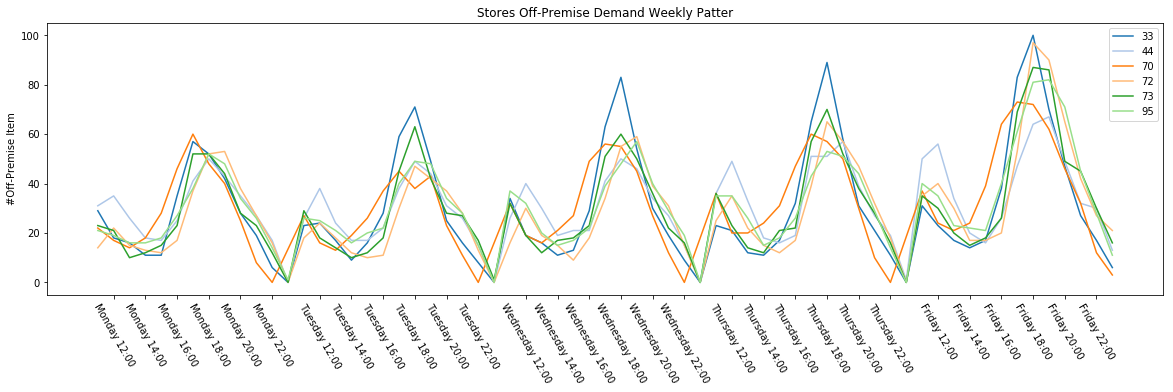

In [361]:
palette = plt.get_cmap('tab20')
plt.figure(figsize=(20,5))
Day_Time = Day_Time.sort_values(by=['StoreKey','DayofWeekNum','FullHour'],ascending=True)
s = [33,44,70,72,73,95,100]
for i in range(0,6):
    plt_data = Day_Time[(Day_Time['StoreKey']==s[i])&(((Day_Time['FullHour']!=10)&(Day_Time['DayofWeekNum']<=5))|
                                                      (Day_Time['DayofWeekNum']<=5))]
    plt.plot(plt_data['Time'],plt_data['OffSiteItem'],c=palette(i),label=s[i])
plt.xticks(plt_data[plt_data['Label2']]['Time'],rotation=300)
plt.title('Stores Off-Premise Demand Weekly Patter')
plt.ylabel('#Off-Premise Item')
plt.legend() 

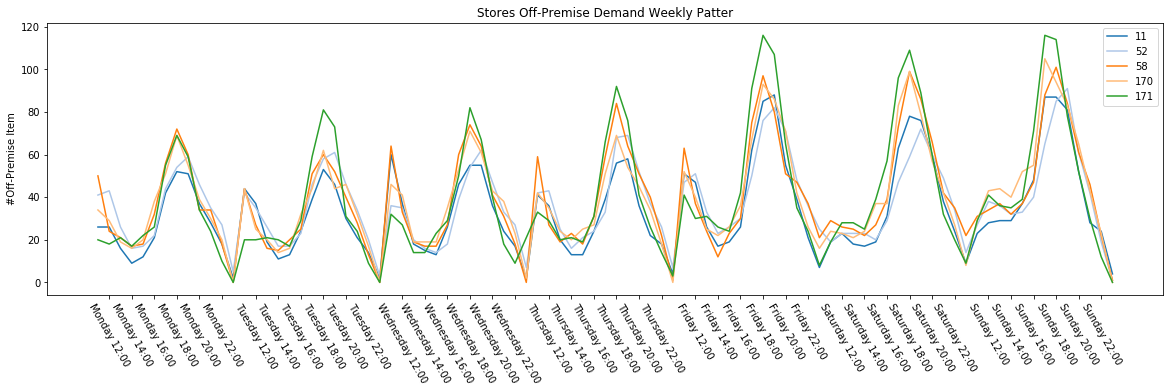

In [362]:
palette = plt.get_cmap('tab20')
plt.figure(figsize=(20,5))
Day_Time = Day_Time.sort_values(by=['StoreKey','DayofWeekNum','FullHour'],ascending=True)
s = [11,52,58,170,171,200]
for i in range(0,5):
    plt_data = Day_Time[Day_Time['StoreKey']==s[i]]
    plt.plot(plt_data['Time'],plt_data['OffSiteItem'],c=palette(i),label=s[i])
plt.xticks(plt_data[plt_data['Label2']]['Time'],rotation=300)
plt.title('Stores Off-Premise Demand Weekly Patter')
plt.ylabel('#Off-Premise Item')
plt.legend() 